In [1]:
#importing libraries....

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Now, we have to clean our data**

# EDA

In [5]:
# We will drop column name cabin because it contains several null values

df = df.drop(columns='Cabin',axis =1)

In [6]:
# We are taking mean of age to fill NaN value present in age column.

df['Age'].fillna(df['Age'].mean(),inplace = True)

In [7]:
# In embarked column there are two Nan values alnd all data present in this column is categorical data,so i am filling it with mode values.
df['Embarked'].mode()

0    S
dtype: object

In [8]:
df['Embarked'].fillna(df['Age'].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data Visualiztion

<AxesSubplot:xlabel='Sex', ylabel='count'>

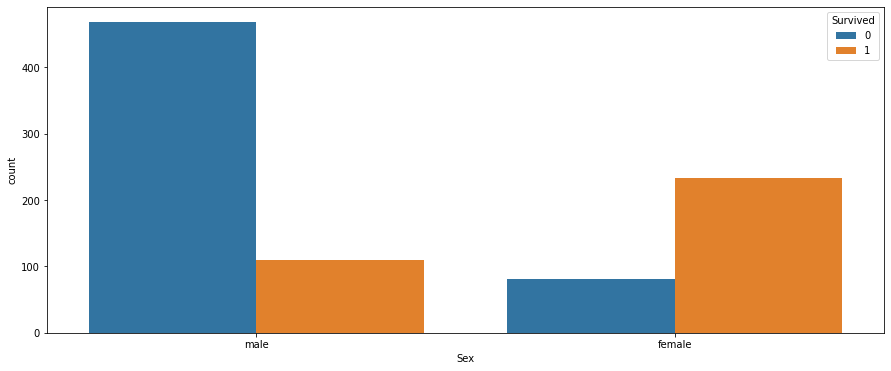

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(data = df,x= 'Sex',hue = 'Survived')

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

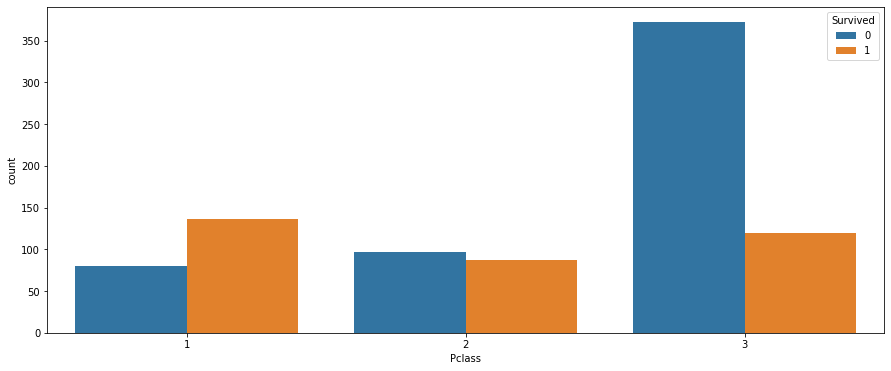

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data = df,x= 'Pclass',hue = 'Survived')

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

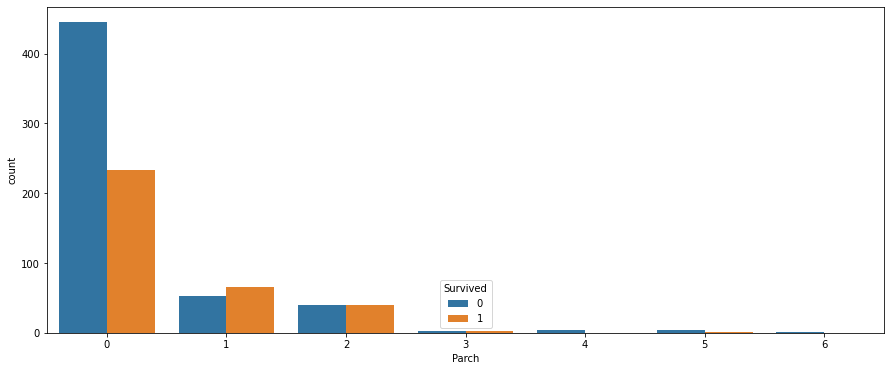

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(data = df,x= 'Parch',hue = 'Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

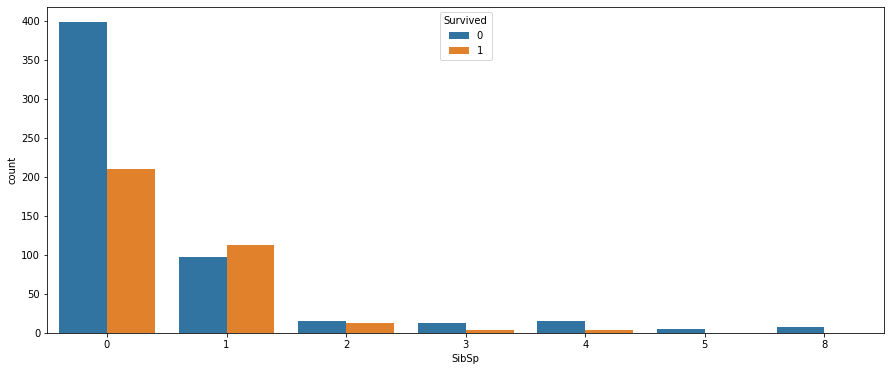

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data = df,x= 'SibSp',hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

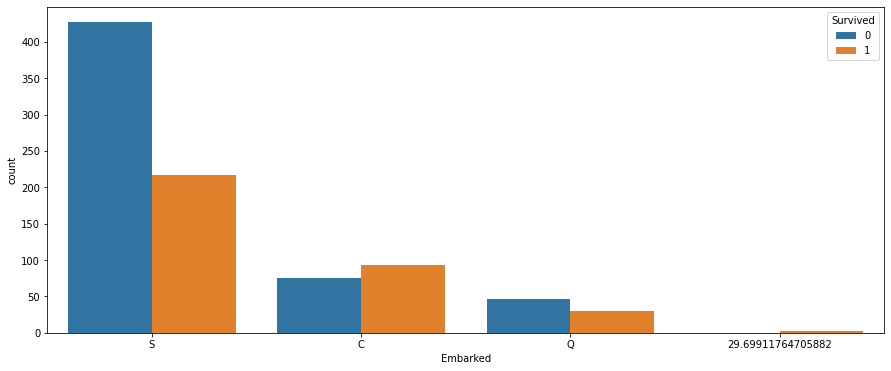

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data = df,x= 'Embarked',hue = 'Survived')

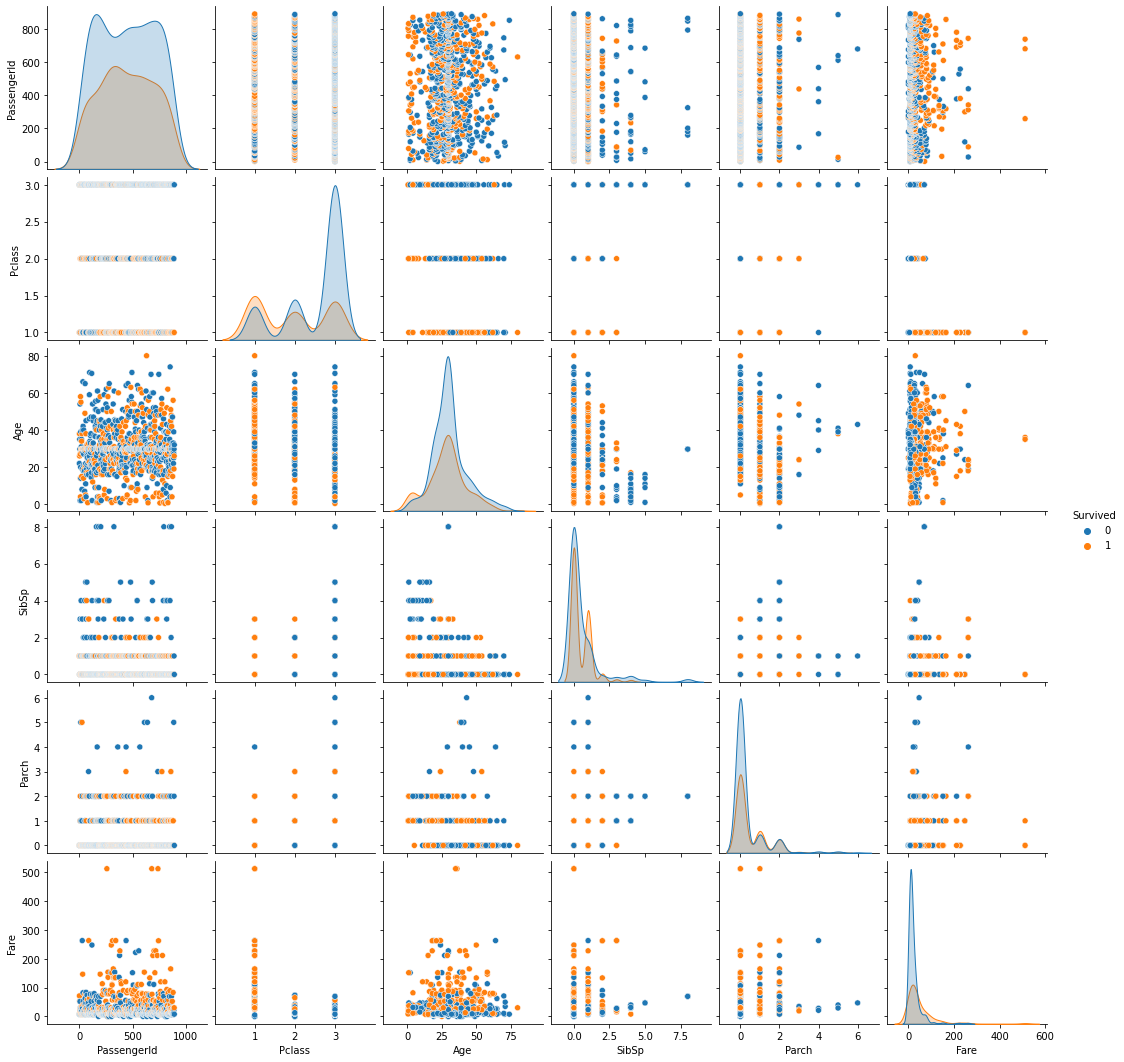

In [19]:
sns.pairplot(df,hue = 'Survived')

In [20]:
# As we saw in countplot between **Sex** and **Survived** we got to know that Survivors depends upon Sex.
# So, we apply labelling .. 
df.replace({'Sex':{'female':0,'male': 1}},inplace = True)

In [21]:
# As we saw in countplot between **Embarked** and **Survived** we got to know that Survivors depends upon Embarked.
# So, we apply labelling.. 
df.replace({'Embarked':{'S':0,'C': 1,'Q':2}},inplace = True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


<AxesSubplot:>

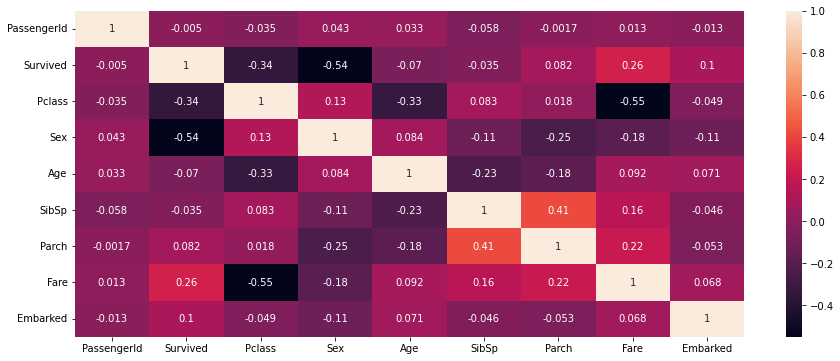

In [23]:
# This shows the correlation amoung all parameters..

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot = True)

In [24]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
y = df['Survived']

# Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(accuracy_score(y_test,predictions))

0.8135593220338984


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier(criterion='entropy')

In [33]:
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)

In [34]:
print(accuracy_score(y_test,prediction))

0.8


In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       175
           1       0.76      0.75      0.75       120

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Appling all ML classification algorithms..

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [38]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis(solver='svd',shrinkage=None,priors=None,n_components=None,store_covariance=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC( )))

## Results of all the algo.

In [39]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

LR: 0.795282
LDA: 0.786977
KNN: 0.763446
CART: 0.761780
NB: 0.790198
SVM: 0.817034
